In [1]:
from subpred.util import load_df
import pandas as pd


In [2]:
# TODO Different ways to filter for passive transporters, different definitions
# TODO What to do about multiple substrates? Create stats on them
# TODO Plots: Dim reduction, Hclust, Kmeans
# TODO stats on 2.B, 2.C, 2.D
# TODO possible to make bacteria-only dataset?
# TODO sequence clustering
# TODO what to do about complexes?


When clustering the entire dataset of *E. coli* transporters in the previous notebook, we discovered that clusters form based on transport mechanism or protein family, not on substrates, which is what we wanted. The idea now is to only look at one type of transmembrane transporter, to find out if we can divide that set into substrates. We already had the suspicion in Manuscript 1 that the *A. thaliana* model worked to well because virtually all of the transporters in our dataset were secondary active. 

In this notebook, we will try creating datasets that only contain secondary active transporters, which typically transport small hydrophilic molecules across membranes. This excludes channels (passive transporters), binding proteins from transport complexes such as ABC transporters, primary active transporters, and others. We will look at those in other notebooks.

Secondary active transporters are gradient-driven transporters, typically with alpha-helical structures. The biggest category should be the Porters, in the form of Uniporters, Symporters and Antiporters. The latter two come with the challenge that they fall into two or more substrate classes. We should create different categories for the individual combinations, and see if they make good substrate classes. The mechanism usually works by a conformational change in the protein, through the presence of a substrate.

We will also explore four different ways of creating the passive transporter dataset: TCDB, Gene Ontology, Keywords and Interpro domains. The respective datasets will be compared in terms of size and overlap. TCDB might have the most biologically accurate data, but is not available for most organisms. *E. coli* is a rare example where most of the transporters have an entry. 

## Protein dataset

Loading the Uniprot data for all organisms:

In [3]:
df_uniprot = load_df("uniprot")
df_uniprot


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


Filtering for *E coli K12*, since that strain has the highest number of functional annotations.

In [4]:
df_uniprot_ecoli = df_uniprot[df_uniprot.organism_id == 83333].drop(
    "organism_id", axis=1
)
df_uniprot_ecoli


,gene_names,protein_names,reviewed,protein_existence,sequence
Uniprot,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...
...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...


What is the distribution of evidence codes among Swissprot and TrEMBL?

In [5]:
df_uniprot_ecoli.groupby(["reviewed", "protein_existence"]).size().reset_index().rename(
    columns={0: "count"}
)


,reviewed,protein_existence,count
0,False,1,1
1,False,2,1
2,True,1,3118
3,True,2,164


This organism seems to be researched very well. TrEMBL only adds two additional samples to the dataset. Which ones are those?

In [6]:
df_uniprot_ecoli[~df_uniprot_ecoli.reviewed]


,gene_names,protein_names,reviewed,protein_existence,sequence
Uniprot,,,,,
A0A7H2C7B0,speFL ECK4660 b4803,Leader peptide SpeFL (Arrest peptide SpeFL),False,2,MENNSRTMPHIRRTTHIMKFAHRNSFDFHFFNAR
A0A0A6YVN8,D-tagatose 3-epimerase,D-tagatose 3-epimerase,False,1,MNKVGMFYTYWSTEWMVDFPATAKRIAGLGFDLMEISLGEFHNLSD...


A metal ion binding protein with otherwise unknown function or location, and an expression factor. Nothing related to transport, we can remove them.

In [7]:
df_uniprot_ecoli = df_uniprot_ecoli[df_uniprot_ecoli.reviewed].drop(
    ["reviewed"], axis=1
)
df_uniprot_ecoli


,gene_names,protein_names,protein_existence,sequence
Uniprot,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...
...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...


It could also be interesting to have a bacteria-only dataset, and compare that to *E. coli*. Is there a tsv file that maps organism id to kingdom?

## Annotations for filtering out passive transporters

Different databases have different definitions of transporter classes, and different annotations.

#### TCDB:

The *TCDB class 2* represents the *Electrochemical Potential-driven Transporters*. These are split into subclasses 2.A (Porters) and 2.B, 2.C and 2.D . Class 2.A seems to correspond to the typical definition of secondary active transporters, so we should look at the remaining three subclasses.

#### Gene Ontology:

The term *secondary active transmembrane transporter activity* (GO:0015291) is a molecular function annotation. The definition is:

*Enables the transfer of a solute from one side of a membrane to the other, up its concentration gradient. The transporter binds the solute and undergoes a series of conformational changes. Transport works equally well in either direction and is driven by a chemiosmotic source of energy, not direct ATP coupling. Secondary active transporters include symporters and antiporters.*

The GO entry cites the TCDB paper as its source, so it seems to use the same definitions.

Child terms include: symporter activity, uniporter activity, antiporter activity.

We should look into electronically inferred annotations (IEA). How would they impact the number of secondary active transport annotations in our dataset?

Qualifiers for the annotations should be filtered by "enables", which means that the protein is directly responsible for the function.

#### Keywords:

- Symport (KW-0769): Protein involved in the transport of solutes across a biological membrane in one direction, which depends on the transport of another solute in the same direction. One molecule can move up an electrochemical gradient because the movement of the other molecule is more favorable. Example: the sodium/glucose co-transport.
- Antiport (KW-0050): Protein involved in the transport of a solute across a biological membrane coupled, directly, to the transport of a different solute in the opposite direction.
- There is no keywords for uniport, when looking at examples it seems like they are just annotated with their substrate keyword and "Transport". Some Uniporters in Uniprot seem to be annotated with Symport or Antiport in GO. Uniprot typically depends on a concentration gradient between the two compartments, independently of the movement of any other molecular species. Example is the GLUT family of sugar transporters, which is responsible for sugar uptake in mammals (Reviews [1](https://doi.org/10.3390/ijms23158698), [2](https://doi.org/10.1007/s00424-020-02411-3)).


#### Interpro:

The biggest superfamily of secondary active transporters is the MFS family. All members of that family contain the same sequence domain. Generally, the TCDB is structured along protein families, which are typically defined by the existence of a particula domain. If we create a dataset of all secondary active transport families, we can use Interpro annotations as well. 


### TCDB annotations analysis

In [8]:
df_tcdb = load_df("tcdb_substrates")
df_tcdb


,tcdb_id,variable,value
0,2.A.52.2.2,chebi_id,CHEBI:23337
1,2.A.52.2.2,chebi_id,CHEBI:25517
2,2.A.22.2.5,chebi_id,CHEBI:9175
3,2.A.22.2.5,chebi_id,CHEBI:8345
4,2.A.90.2.4,chebi_id,CHEBI:8816
...,...,...,...
34308,2.A.47.1.5,Uniprot,Q9W7I2
34309,2.A.18.3.2,Uniprot,Q9XE48
34310,2.A.18.3.3,Uniprot,Q9XE49
34311,2.A.29.11.2,Uniprot,Q9ZNY4


Filtering for E Coli and transforming from long table to sparse table:

In [9]:
tcdb_uniprot = df_tcdb[df_tcdb.variable == "Uniprot"][["tcdb_id", "value"]].rename(
    columns={"value": "Uniprot"}
)
tcdb_chebi = df_tcdb[df_tcdb.variable == "chebi_term"][["tcdb_id", "value"]].rename(
    columns={"value": "substrate"}
)

df_tcdb_sparse = pd.merge(tcdb_uniprot, tcdb_chebi, how="outer", on="tcdb_id")
df_tcdb_sparse_ecoli = (
    df_tcdb_sparse[df_tcdb_sparse.Uniprot.isin(df_uniprot_ecoli.index)][
        ["Uniprot", "tcdb_id", "substrate"]
    ]
    .sort_values(["Uniprot", "tcdb_id", "substrate"])
    .reset_index(drop=True)
)
df_tcdb_sparse_ecoli


,Uniprot,tcdb_id,substrate
0,A5A618,3.D.4.3.2,NaN
1,A5A627,1.C.103.1.1,inorganic anion
2,A5A627,1.C.103.1.1,molecule
3,C1P5Z7,4.A.1.1.1,D-glucopyranose
4,C1P611,1.C.135.1.1,inorganic ion
...,...,...,...
1201,Q47706,1.B.25.1.5,beta-D-glucosiduronic acid
1202,Q59385,3.A.3.5.5,copper(1+)
1203,Q59385,3.A.3.5.5,silver(1+)
1204,Q6BEX0,3.A.1.2.25,UDP-sugar


Filtering for class 2:

In [10]:
df_tcdb_sparse_ecoli_class2 = df_tcdb_sparse_ecoli[
    df_tcdb_sparse_ecoli.tcdb_id.str.startswith("2")
].reset_index(drop=True)
df_tcdb_sparse_ecoli_class2


,Uniprot,tcdb_id,substrate
0,P02920,2.A.1.5.1,4-nitrophenyl alpha-D-galactoside
1,P02920,2.A.1.5.1,4-nitrophenyl-beta-D-galactoside
2,P02920,2.A.1.5.1,lactose
3,P02920,2.A.1.5.1,maltose
4,P02920,2.A.1.5.1,melibiose
...,...,...,...
518,Q46839,2.A.14.1.2,lactate
519,Q46892,2.A.8.1.7,NaN
520,Q46909,2.A.1.1.95,metabolite
521,Q47142,2.A.1.27.1,hydratropic acid


What is the superfamily distribution?

In [11]:
df_tcdb_sparse_ecoli_class2.tcdb_id.drop_duplicates().transform(
    lambda x: x[:3]
).value_counts()


2.A    219
2.C      2
Name: tcdb_id, dtype: int64

Almost all proteins are in the Porters family, except for four proteins in the Ion-gradient-driven energizers family. According to TCDB, their mechanism is poorly understood, but they could be moving protons into the periplasmic space to enable the uptake of substrates through the passive transporters in the outer membrane. They use "proton motive force". Three of them seem to be related.

In [12]:
df_tcdb_sparse_ecoli[df_tcdb_sparse_ecoli.tcdb_id.str.startswith("2.C")].merge(
    df_uniprot_ecoli.protein_names, how="left", left_on="Uniprot", right_index=True
)


,Uniprot,tcdb_id,substrate,protein_names
18,P02929,2.C.1.1.1,NaN,Protein TonB
110,P0A855,2.C.1.2.1,phospholipid,Tol-Pal system protein TolB
543,P19934,2.C.1.2.1,phospholipid,Tol-Pal system protein TolA
898,P45955,2.C.1.2.1,phospholipid,Cell division coordinator CpoB


How many proteins in E coli have a secondary active transport system annotation?

In [13]:
secondary_active_transporters_tcdb = set(df_tcdb_sparse_ecoli_class2.Uniprot.unique())
len(secondary_active_transporters_tcdb)


238

How many different secondary active transport systems are present in E Coli?

In [14]:
df_tcdb_sparse_ecoli_class2.tcdb_id.unique().shape[0]


221

What are the proteins that share the same transport system?

In [15]:
transport_system_number_of_proteins = (
    df_tcdb_sparse_ecoli_class2.drop("substrate", axis=1)
    .drop_duplicates()
    .groupby("tcdb_id")
    .Uniprot.apply(len)
)
transport_system_number_of_proteins.value_counts()


1    208
2     10
3      2
4      1
Name: Uniprot, dtype: int64

208 transport systems are annotated with one protein. Only one is annotated with more than three proteins. What is the reason for annotating a transport system with multiple proteins?

In [16]:
transport_system_number_of_proteins[transport_system_number_of_proteins == 4]


tcdb_id
2.A.64.1.1    4
Name: Uniprot, dtype: int64

The transport system with four proteins is a protein complex (TatABCE), that explains it. 
Is that true for all of them?

In [17]:
transport_system_number_of_proteins[
    transport_system_number_of_proteins > 1
].index.to_series().reset_index(drop=True).drop_duplicates().to_frame().merge(
    df_tcdb_sparse_ecoli_class2, how="left", on="tcdb_id"
).merge(
    df_uniprot_ecoli[["gene_names", "protein_names"]],
    how="left",
    left_on="Uniprot",
    right_index=True,
).drop(
    "substrate", axis=1
).drop_duplicates().sort_values(
    ["tcdb_id", "gene_names"]
).reset_index(
    drop=True
)


,tcdb_id,Uniprot,gene_names,protein_names
0,2.A.108.2.3,P31545,efeB ycdB b1019 JW1004,Deferrochelatase (EC 4.98.1.1) (Peroxidase Efe...
1,2.A.108.2.3,P0AB24,efeO ycdO b1018 JW1003,Iron uptake system component EfeO
2,2.A.113.1.1,P76425,rcnA yohM b2106 JW2093,Nickel/cobalt efflux system RcnA
3,2.A.113.1.1,P64534,rcnB yohN b2107 JW5346,Nickel/cobalt homeostasis protein RcnB
4,2.A.37.1.1,P03819,kefC trkC b0047 JW0046,Glutathione-regulated potassium-efflux system ...
5,2.A.37.1.1,P0A754,kefF yabF b0046 JW0045,Glutathione-regulated potassium-efflux system ...
6,2.A.38.1.1,P0AGI8,trkA b3290 JW3251,Trk system potassium uptake protein TrkA (K(+)...
7,2.A.38.1.1,P0AFZ7,trkH b3849 JW5576,Trk system potassium uptake protein TrkH
8,2.A.56.1.2,P37674,yiaM b3577 JW3549,"2,3-diketo-L-gulonate TRAP transporter small p..."
9,2.A.56.1.2,P37676,yiaO b3579 JW3551,"2,3-diketo-L-gulonate-binding periplasmic prot..."


Yes, they all have matching names. Some of them could be operons?

How many have chebi terms for substrates?

In [18]:
tmp = df_tcdb_sparse_ecoli_class2[["tcdb_id", "substrate"]].drop_duplicates()
transport_systems_nosubstrates = set(
    tmp[tmp.substrate.isnull() | (tmp.substrate == "molecule")].tcdb_id
)
print(
    "transport systems without chebi annotations:", len(transport_systems_nosubstrates)
)
tmp = (
    tmp[~tmp.tcdb_id.isin(transport_systems_nosubstrates)].groupby("tcdb_id").apply(len)
)

transport_system_number_of_substrates = pd.concat(
    [pd.Series(index=list(transport_systems_nosubstrates), data=0), tmp]
)
transport_system_number_of_substrates


transport systems without chebi annotations: 38


2.A.3.7.5     0
2.A.7.26.1    0
2.A.3.6.4     0
2.A.1.52.1    0
2.A.66.2.3    0
             ..
2.A.9.3.1     1
2.A.95.1.1    1
2.A.95.1.5    1
2.A.96.1.1    3
2.C.1.2.1     1
Length: 221, dtype: int64

What is the distribution of substrate counts for the transport systems?

Text(0.5, 1.0, 'TCDB substrate annotations for class 2 transporters in E coli')

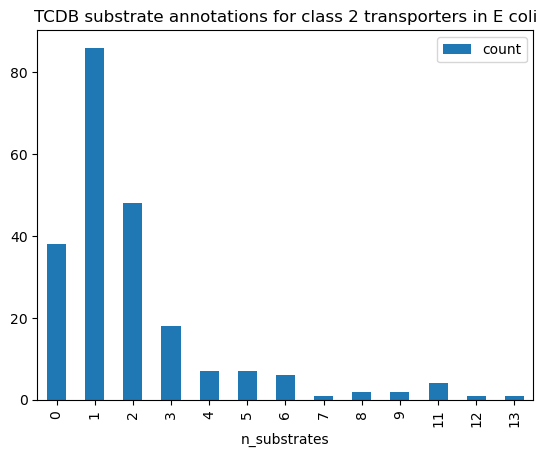

In [19]:
g = transport_system_number_of_substrates.value_counts().reset_index(name="count").rename(
    columns={"index": "n_substrates"}
).sort_values("n_substrates").plot.bar(x="n_substrates", y="count")
g.set_title("TCDB substrate annotations for class 2 transporters in E coli")

What are the transport systems with a large number of substrates?

In [20]:
transport_system_number_of_substrates[transport_system_number_of_substrates > 12]


2.A.1.2.19    13
dtype: int64

The transport system with 13 substrates is the "Multidrug resistance exporter" (MdfA). The large number of substrates also comes from well-known drugs that the transporters are known to carry.

In [21]:
transport_system_number_of_substrates[transport_system_number_of_substrates == 12]


2.A.1.2.62    12
dtype: int64

The 12 substrate transporter is also a multidrug resistance pump called PunC.

In [22]:
transport_system_number_of_substrates[transport_system_number_of_substrates == 7]


2.A.1.5.1    7
dtype: int64

The transporter with 7 substrates is lacY, a proton-sugar symporter

### Gene ontology

In [23]:
from subpred.ontology import (
    GeneOntology,
    GO_FILE,
    add_go_ancestors,
    EVIDENCE_CODE_TO_DESCRIPTION,
)

go_owl = GeneOntology(GO_FILE)


In [24]:
df_go = load_df("go")
df_go_ecoli = df_go[df_go.Uniprot.isin(df_uniprot_ecoli.index)].reset_index(drop=True)
df_go_ecoli = add_go_ancestors(df_go_ecoli, go_owl)
df_go_ecoli = df_go_ecoli.assign(go_term=df_go_ecoli.go_id.transform(go_owl.get_label))

df_go_ecoli_mf = (
    df_go_ecoli[df_go_ecoli.aspect == "F"]
    .drop("aspect", axis=1)
)
print("distribution of qualifiers:\n", df_go_ecoli_mf.qualifier.value_counts())
df_go_ecoli_mf = (
    df_go_ecoli[df_go_ecoli.qualifier == "enables"]
    .reset_index(drop=True)
    .drop("qualifier", axis=1)
)
df_go_ecoli_mf = df_go_ecoli_mf.sort_values(df_go_ecoli_mf.columns.tolist())
df_go_ecoli_mf = df_go_ecoli_mf.assign(
    evidence_category=df_go_ecoli_mf.evidence_code.map(EVIDENCE_CODE_TO_DESCRIPTION)
)
df_go_ecoli_mf = df_go_ecoli_mf.reset_index(drop=True)
df_go_ecoli_mf


distribution of qualifiers:
 enables                                           76606
contributes_to                                      745
NOT|enables                                          57
NOT|acts_upstream_of_or_within                        0
NOT|acts_upstream_of                                  0
NOT|acts_upstream_of_or_within_negative_effect        0
acts_upstream_of_or_within_negative_effect            0
acts_upstream_of_negative_effect                      0
NOT|part_of                                           0
NOT|contributes_to                                    0
NOT|colocalizes_with                                  0
acts_upstream_of_positive_effect                      0
acts_upstream_of_or_within_positive_effect            0
acts_upstream_of                                      0
involved_in                                           0
NOT|located_in                                        0
acts_upstream_of_or_within                            0
colocalizes_with   

,Uniprot,evidence_code,aspect,go_id,go_term,evidence_category
0,A5A627,IDA,F,GO:0003674,molecular_function,experimental_evidence
1,A5A627,IDA,F,GO:0005215,transporter activity,experimental_evidence
2,A5A627,IDA,F,GO:0005216,ion channel activity,experimental_evidence
3,A5A627,IDA,F,GO:0005253,anion channel activity,experimental_evidence
4,A5A627,IDA,F,GO:0008509,anion transmembrane transporter activity,experimental_evidence
...,...,...,...,...,...,...
76601,Q93K97,IBA,F,GO:0016818,"hydrolase activity, acting on acid anhydrides,...",phylogenetically_inferred
76602,Q93K97,IBA,F,GO:0019144,ADP-sugar diphosphatase activity,phylogenetically_inferred
76603,Q93K97,IPI,F,GO:0003674,molecular_function,experimental_evidence
76604,Q93K97,IPI,F,GO:0005488,binding,experimental_evidence


In [25]:
df_go_ecoli_mf_secondary = df_go_ecoli_mf[
    df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity"
]
df_go_ecoli_mf_secondary.evidence_category.value_counts()


electronic_annotation        96
experimental_evidence        80
phylogenetically_inferred    44
computational_analysis        8
Name: evidence_category, dtype: int64

Is there overlap between the evidence codes?

In [26]:
print("non-iea annotations:")
print(
    df_go_ecoli_mf_secondary[df_go_ecoli_mf_secondary.evidence_code != "IEA"][
        ["Uniprot", "go_id"]
    ]
    .drop_duplicates()
    .shape[0]
)
print("iea annotations:")
print(
    df_go_ecoli_mf_secondary[df_go_ecoli_mf_secondary.evidence_code == "IEA"][
        ["Uniprot", "go_id"]
    ]
    .drop_duplicates()
    .shape[0]
)
print("overlap:")
pd.concat(
    [
        df_go_ecoli_mf_secondary[df_go_ecoli_mf_secondary.evidence_code != "IEA"][
            ["Uniprot", "go_id"]
        ],
        df_go_ecoli_mf_secondary[df_go_ecoli_mf_secondary.evidence_code == "IEA"][
            ["Uniprot", "go_id"]
        ],
    ]
).drop_duplicates().shape[0]


non-iea annotations:
92
iea annotations:
96
overlap:


127

Yes, there is a considerable overlap. Including IEA terms increases the number of annotated proteins from 92 to 127.

In [27]:
del df_go_ecoli_mf_secondary

How many proteins in E coli are annotated with "secondary active transmembrane transporter activity"?

In [28]:
secondary_active_transporters_go = set(
    df_go_ecoli_mf[
        df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity"
    ].Uniprot.unique()
)
len(secondary_active_transporters_go)


127

Only about half as many compared to the TCDB class 2! Including all in the preprocessing above qualifiers did not change that. What is the distribution of proteins among the child terms of transmembrane transporter activity?

In [29]:
all_transporters_go = set(
    df_go_ecoli_mf[
        df_go_ecoli_mf.go_term == "transmembrane transporter activity"
    ].Uniprot.unique()
)
len(all_transporters_go)


480

Only half as many compared to the TCDB class 2! Including all qualifiers did not change that. What is the distribution of proteins among the child terms of transmembrane transporter activity?

In [30]:
def get_child_term_distribution(go_term: str):
    # prints count of child terms of a particular go term, as dict
    direct_child_terms = {
        go_owl.get_label(go_id)
        for go_id in go_owl.get_children(go_owl.get_identifier(go_term))
    }
    direct_child_terms_count = {
        child_term: df_go_ecoli_mf[df_go_ecoli_mf.go_term == child_term]
        .Uniprot.unique()
        .shape[0]
        for child_term in direct_child_terms
    }
    return dict(
        sorted(direct_child_terms_count.items(), key=lambda item: item[1], reverse=True)
    )


#### Distribution of child terms of "transmembrane transporter activity":

In [31]:
get_child_term_distribution("transmembrane transporter activity")


{'active transmembrane transporter activity': 240,
 'ion transmembrane transporter activity': 196,
 'inorganic molecular entity transmembrane transporter activity': 133,
 'organic acid transmembrane transporter activity': 78,
 'carbohydrate transmembrane transporter activity': 70,
 'passive transmembrane transporter activity': 55,
 'amide transmembrane transporter activity': 35,
 'carbohydrate derivative transmembrane transporter activity': 29,
 'xenobiotic transmembrane transporter activity': 27,
 'efflux transmembrane transporter activity': 25,
 'macromolecule transmembrane transporter activity': 17,
 'sulfur compound transmembrane transporter activity': 16,
 'organic hydroxy compound transmembrane transporter activity': 16,
 'modified amino acid transmembrane transporter activity': 13,
 'siderophore-iron transmembrane transporter activity': 12,
 'polyamine transmembrane transporter activity': 12,
 'nucleobase transmembrane transporter activity': 12,
 'nucleobase-containing compound 

The largest group is made up of active transporters. This includes secondary active, and primary active (e.g. the ATP-driven transport complexes). Some of these terms, like active and passive transport, are related to transport mechanism, while others, like "carbohydrate transmembrane transporter activity" and "amide transmembrane transporter activity" are related to substrate. The average protein is annotated with 2.14 of the child terms, so these are not mutually exclusive:

In [32]:
print(
    f"total annotations: {sum(get_child_term_distribution('transmembrane transporter activity').values())} annotations and {len(all_transporters_go)} proteins"
)


total annotations: 1030 annotations and 480 proteins


#### Distribution of child terms of "active transmembrane transporter activity":

In [33]:
get_child_term_distribution("active transmembrane transporter activity")


{'secondary active transmembrane transporter activity': 127,
 'active ion transmembrane transporter activity': 107,
 'primary active transmembrane transporter activity': 87,
 'protein-N(PI)-phosphohistidine-sugar phosphotransferase activity': 25,
 'protein-phosphocysteine-sugar phosphotransferase activity': 23,
 'sorbitol transmembrane transporter activity': 0,
 'monoamine transmembrane transporter activity': 0}

Are the missing 2.A proteins distributed among the other non-primary types of active transport?

In [34]:
tcdb_class2_proteins = set(df_tcdb_sparse_ecoli_class2.Uniprot.unique())
for term in {
    go_owl.get_label(x)
    for x in go_owl.get_children(
        go_owl.get_identifier("active transmembrane transporter activity")
    )
}:
    term_proteins = set(df_go_ecoli_mf[df_go_ecoli_mf.go_term == term].Uniprot.unique())
    print(term)
    print(len(term_proteins & tcdb_class2_proteins))


primary active transmembrane transporter activity
2
sorbitol transmembrane transporter activity
0
protein-N(PI)-phosphohistidine-sugar phosphotransferase activity
0
secondary active transmembrane transporter activity
111
active ion transmembrane transporter activity
71
monoamine transmembrane transporter activity
0
protein-phosphocysteine-sugar phosphotransferase activity
0


In [35]:
len(set(
    df_go_ecoli_mf[
        df_go_ecoli_mf.go_term == "active ion transmembrane transporter activity"
    ].Uniprot.unique()
)  & set(
    df_go_ecoli_mf[
        df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity"
    ].Uniprot.unique()
)& set(
    df_go_ecoli_mf[
        df_go_ecoli_mf.go_term == "transmembrane transporter activity"
    ].Uniprot.unique()
)

)

80

In [36]:
tcdb_class2_proteins = set(df_tcdb_sparse_ecoli_class2.Uniprot.unique())
for term in {
    go_owl.get_label(x)
    for x in go_owl.get_children(
        go_owl.get_identifier("active transmembrane transporter activity")
    )
}:
    term_proteins = set(df_go_ecoli_mf[df_go_ecoli_mf.go_term == term].Uniprot.unique())
    print(term)
    print(len(term_proteins & tcdb_class2_proteins))


primary active transmembrane transporter activity
2
sorbitol transmembrane transporter activity
0
protein-N(PI)-phosphohistidine-sugar phosphotransferase activity
0
secondary active transmembrane transporter activity
111
active ion transmembrane transporter activity
71
monoamine transmembrane transporter activity
0
protein-phosphocysteine-sugar phosphotransferase activity
0


Proteins with class 2 annotations in TCDB, but no "secondary active transmembrane transporter activity" go term:

In [37]:
term_proteins = set(
    df_go_ecoli_mf[
        df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity"
    ].Uniprot.unique()
)
df_uniprot_ecoli_non_go_tcdb = df_uniprot_ecoli.loc[
    list(tcdb_class2_proteins - term_proteins)
]
df_uniprot_ecoli_non_go_tcdb


,gene_names,protein_names,protein_existence,sequence
Uniprot,,,,
Q47377,arnE pmrL yfbW b4544 JW2252,Probable 4-amino-4-deoxy-L-arabinose-phosphoun...,1,MIWLTLVFASLLSVAGQLCQKQATCFVAINKRRKHIVLWLGLALAC...
P0AAW9,acrZ ybhT b0762 JW5102,Multidrug efflux pump accessory protein AcrZ (...,1,MLELLKSLVFAVIMVPVVMAIILGLIYGLGEVFNIFSGVGKKDQPGQNH
P31122,sotB ydeA b1528 JW1521,Sugar efflux transporter,1,MTTNTVSRKVAWLRVVTLAVAAFIFNTTEFVPVGLLSDIAQSFHMQ...
P0AG34,rhtB yigK b3824 JW5585,Homoserine/homoserine lactone efflux protein,1,MTLEWWFAYLLTSIILSLSPGSGAINTMTTSLNHGYRGAVASIAGL...
P76169,ynfA b1582 JW1574,UPF0060 membrane protein YnfA,1,MIKTTLLFFATALCEIIGCFLPWLWLKRNASIWLLLPAGISLALFV...
...,...,...,...,...
P0ABG7,mrdB rodA b0634 JW0629,Peptidoglycan glycosyltransferase MrdB (PGT) (...,1,MTDNPNKKTFWDKVHLDPTMLLILLALLVYSALVIWSASGQDIGMM...
P32715,mdtO yjcQ b4081 JW4042,Multidrug resistance protein MdtO,1,MSALNSLPLPVVRLLAFFHEELSERRPGRVPQTVQLWVGCLLVILI...
P75763,ybhI b0770 JW0753,Inner membrane protein YbhI,1,MNKKSLWKLILILAIPCIIGFMPAPAGLSELAWVLFGIYLAAIVGL...


In [38]:
print(len(tcdb_class2_proteins))
print(len(term_proteins))
print(len(tcdb_class2_proteins - term_proteins))
print(len(tcdb_class2_proteins & term_proteins))


238
127
127
111


Let's look at one protein as an example:

In [39]:
df_tcdb_sparse_ecoli_class2[df_tcdb_sparse_ecoli_class2.Uniprot == "P0AB24"]


,Uniprot,tcdb_id,substrate
62,P0AB24,2.A.108.2.3,iron(2+)


Uniprot description: Involved in Fe2+ uptake. Could be an iron-binding and/or electron-transfer component

The TCDB system description is: "The acid-induced, low pH, ferrous iron (Fe2+) uptake transporter, EfeUOB (YcdN); cryptic in E. coli K12 (Cao et al. 2007; Grosse et al., 2006).". Could it be that these are not transmembrane proteins, but transporters in the periplasmic space? GO terms of  P0AB24:

In [40]:
df_go_ecoli[df_go_ecoli.Uniprot == "P0AB24"].assign(
    go_term=df_go_ecoli.go_id.transform(go_owl.get_label)
)


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
83137,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0050896,response to stimulus
83138,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0008150,biological_process
83139,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0006979,response to oxidative stress
83140,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0006950,response to stress
83141,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0009416,response to light stimulus
83142,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0009411,response to UV
83143,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0009628,response to abiotic stimulus
83144,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0009314,response to radiation
83145,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0009636,response to toxic substance
83146,P0AB24,acts_upstream_of_or_within,IMP,P,GO:0042221,response to chemical


This protein is in periplasmic space! What about the cellular locations of the other proteins?

In [41]:
df_go_ecoli_non_go_tcdb = df_go_ecoli[
    df_go_ecoli.Uniprot.isin(df_uniprot_ecoli_non_go_tcdb.index.tolist())
].assign(go_term=df_go_ecoli.go_id.transform(go_owl.get_label))
df_go_ecoli_non_go_tcdb


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
8573,P02929,acts_upstream_of_or_within,IGI,P,GO:0051234,establishment of localization
8574,P02929,acts_upstream_of_or_within,IGI,P,GO:0071705,nitrogen compound transport
8575,P02929,acts_upstream_of_or_within,IGI,P,GO:0051180,vitamin transport
8576,P02929,acts_upstream_of_or_within,IGI,P,GO:0008150,biological_process
8577,P02929,acts_upstream_of_or_within,IGI,P,GO:0006810,transport
...,...,...,...,...,...,...
272046,Q47377,located_in,IDA,C,GO:0005575,cellular_component
272047,Q47377,located_in,IEA,C,GO:0016020,membrane
272048,Q47377,located_in,IEA,C,GO:0110165,cellular anatomical entity
272049,Q47377,located_in,IEA,C,GO:0005886,plasma membrane


In [42]:
df_go_ecoli_non_go_tcdb[df_go_ecoli_non_go_tcdb.aspect == "C"].go_term.value_counts()


cellular_component                                            366
cellular anatomical entity                                    346
membrane                                                      324
plasma membrane                                               313
protein-containing complex                                     23
periplasmic space                                              18
membrane protein complex                                       13
outer membrane-bounded periplasmic space                       13
transporter complex                                            11
transmembrane transporter complex                               8
cell division site                                              7
efflux pump complex                                             5
plasma membrane protein complex                                 5
cell envelope Sec protein transport complex                     4
intracellular protein-containing complex                        4
TAT protei

No, most proteins are in plasma membrane. The dataframe can contain the same annotation multiple times with different evidence codes, hence the high number. 

In [43]:
print(
    df_go_ecoli_non_go_tcdb[df_go_ecoli_non_go_tcdb.aspect == "F"]
    .go_term.value_counts()
    .to_string()
)


molecular_function                                                                     226
transporter activity                                                                   177
transmembrane transporter activity                                                     176
ion transmembrane transporter activity                                                  48
binding                                                                                 40
cation transmembrane transporter activity                                               35
organic acid transmembrane transporter activity                                         34
carboxylic acid transmembrane transporter activity                                      34
anion transmembrane transporter activity                                                28
organic anion transmembrane transporter activity                                        28
amino acid transmembrane transporter activity                                           26

When looking at the Uniprot entries of some examples of inner-membrane proteins that have a TCDB 2.A annotation but not a "secondary active transmembrane transporter activity" annotation, it looks like these proteins mostly lack experimental data to receive a "molecular function" go term, but they are similar enough in terms of sequence and structure to assign them to a TCDB mechanism. Some of the proteins are annotated only with "transmembrane transporter activity" but nothing more specific. Others are only annotated with a substrate (e.g. amino acid transmembrane transporter activity) but not with a mechanism. This could be problematic when filtering by mechanism GO annotation first. Filtering by TCDB is not an option for most organisms, since *E. coli* has the highest percantage of annotations, along with yeast. The third category are transporters in periplasmic space, which are apparently still labeled as membrane transporters. 

#### Distribution of child terms of "secondary active transmembrane transporter activity":

In [44]:
get_child_term_distribution("secondary active transmembrane transporter activity")


{'symporter activity': 82,
 'antiporter activity': 35,
 'inorganic phosphate transmembrane transporter activity': 6,
 'secondary active monocarboxylate transmembrane transporter activity': 4,
 'proton motive force dependent protein transmembrane transporter activity': 3,
 'uniporter activity': 2,
 'secondary active sulfate transmembrane transporter activity': 2,
 'nitrite efflux transmembrane transporter activity': 2,
 'arsenite secondary active transmembrane transporter activity': 1,
 'antimonite secondary active transmembrane transporter activity': 1,
 'glutathione-regulated potassium exporter activity': 1,
 'secondary active p-aminobenzoyl-glutamate transmembrane transporter activity': 1,
 'sulfur-containing amino acid secondary active transmembrane transporter activity': 1,
 'zinc efflux active transmembrane transporter activity': 1,
 'neutral L-amino acid secondary active transmembrane transporter activity': 1,
 'tricarboxylate secondary active transmembrane transporter activity':

## Clustering

In [45]:
tp_go_noiea = set(df_go_ecoli_mf[(df_go_ecoli_mf.evidence_code != "IEA") & (df_go_ecoli_mf.go_term == "secondary active transmembrane transporter activity")].Uniprot.unique())
print(len(tp_go_noiea))
# set(df_tcdb_sparse_ecoli_class2.Uniprot.unique())

tmp = df_tcdb_sparse_ecoli_class2.drop("substrate", axis=1).drop_duplicates().groupby("tcdb_id").apply(len)
tp_tcdb_nocomplexes = set(df_tcdb_sparse_ecoli_class2[df_tcdb_sparse_ecoli_class2.tcdb_id.isin(tmp[tmp == 1].index)].Uniprot.unique())
print(len(tp_tcdb_nocomplexes))

tmp = df_tcdb_sparse_ecoli_class2.drop("Uniprot", axis=1).drop_duplicates().groupby("tcdb_id").apply(len)
tp_tcdb_le3_substrates = set(df_tcdb_sparse_ecoli_class2[df_tcdb_sparse_ecoli_class2.tcdb_id.isin(tmp[tmp <=3].index)].Uniprot.unique())
print(len(tp_tcdb_le3_substrates))

tp_highest_confidence = tp_go_noiea & tp_tcdb_nocomplexes & tp_tcdb_le3_substrates
len(tp_highest_confidence)

92
208
205


63

In [46]:
# TODO finish analysis above
df_uniprot_ecoli_secondary_active = df_uniprot_ecoli.loc[
    tp_go_noiea
]
df_uniprot_ecoli_secondary_active


/tmp/ipykernel_3404111/363326117.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_uniprot_ecoli_secondary_active = df_uniprot_ecoli.loc[


,gene_names,protein_names,protein_existence,sequence
Uniprot,,,,
P46133,abgT ydaH b1336 JW5822 ECK1332,p-aminobenzoyl-glutamate transport protein (PA...,1,MSMSSIPSSSQSGKLYGWVERIGNKVPHPFLLFIYLIIVLMVTTAI...
P31466,adeP purP yieG b3714 JW3692,Adenine permease AdeP,1,MSHQHTTQTSGQGMLERVFKLREHGTTARTEVIAGFTTFLTMVYIV...
P0AGC0,uhpT b3666 JW3641,Hexose-6-phosphate:phosphate antiporter,1,MLAFLNQVRKPTLDLPLEVRRKMWFKPFMQSYLVVFIGYLTMYLIR...
P0AGM7,uraA b2497 JW2482,Uracil permease (Uracil transporter) (Uracil/H...,1,MTRRAIGVSERPPLLQTIPLSLQHLFAMFGATVLVPVLFHINPATV...
P33024,psuT pscT yeiM b2164 JW2151,Putative pseudouridine transporter,1,MDIMRSVVGMVVLLAIAFLLSVNKKSISLRTVGAALLLQIAIGGIM...
...,...,...,...,...
P69212,mdtJ ydgF b1600 JW1592,Spermidine export protein MdtJ,1,MYIYWILLGLAIATEITGTLSMKWASVSEGNGGFILMLVMISLSYI...
P69210,mdtI ydgE b1599 JW1591,Spermidine export protein MdtI,1,MAQFEWVHAAWLALAIVLEIVANVFLKFSDGFRRKIFGLLSLAAVL...
P0AGE4,sstT ygjU b3089 JW3060,Serine/threonine transporter SstT (Na(+)/serin...,1,MTTQRSPGLFRRLAHGSLVKQILVGLVLGILLAWISKPAAEAVGLL...


### Features

In [47]:
from subpred.pssm import calculate_pssm_feature

df_pssm_ecoli_secondary_active = calculate_pssm_feature(
    sequences=df_uniprot_ecoli_secondary_active.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it",
    blast_db="uniref50",
    iterations=3,
)
df_pssm_ecoli_secondary_active


,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P46133,0.831025,0.432133,0.445983,0.337950,0.584488,0.479224,0.423823,0.623269,0.451524,0.720222,...,0.731302,0.360111,0.828255,0.753463,0.484765,0.526316,0.664820,0.573407,0.595568,0.869806
P31466,0.803636,0.210909,0.250909,0.210909,0.581818,0.247273,0.200000,0.552727,0.272727,0.490909,...,0.618182,0.123636,0.705455,0.618182,0.192727,0.345455,0.487273,0.461818,0.392727,0.810909
P0AGC0,0.912530,0.215130,0.307329,0.193853,0.560284,0.309693,0.215130,0.638298,0.255319,0.765957,...,0.758865,0.475177,0.754137,0.687943,0.505910,0.619385,0.673759,0.647754,0.595745,0.775414
P0AGM7,0.821355,0.299795,0.338809,0.248460,0.482546,0.355236,0.291581,0.599589,0.289528,0.605749,...,0.691992,0.293634,0.691992,0.558522,0.328542,0.513347,0.613963,0.316222,0.410678,0.856263
P33024,0.877246,0.119760,0.197605,0.068862,0.532934,0.227545,0.149701,0.479042,0.029940,0.538922,...,0.604790,0.302395,0.589820,0.649701,0.317365,0.422156,0.488024,0.365269,0.461078,0.730539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P69212,0.888889,0.385621,0.424837,0.418301,0.542484,0.444444,0.450980,0.633987,0.437908,0.555556,...,0.699346,0.464052,0.718954,0.581699,0.457516,0.562092,0.653595,0.477124,0.529412,0.836601
P69210,0.879747,0.145570,0.158228,0.056962,0.563291,0.189873,0.126582,0.594937,0.132911,0.632911,...,0.765823,0.417722,0.816456,0.632911,0.398734,0.550633,0.645570,0.455696,0.575949,0.746835
P0AGE4,0.884615,0.294118,0.352941,0.264706,0.509050,0.357466,0.321267,0.547511,0.271493,0.642534,...,0.828054,0.287330,0.789593,0.744344,0.330317,0.432127,0.610860,0.447964,0.497738,0.907240
P10903,0.828042,0.232804,0.214286,0.108466,0.333333,0.240741,0.158730,0.555556,0.185185,0.462963,...,0.616402,0.277778,0.576720,0.558201,0.362434,0.455026,0.500000,0.571429,0.388889,0.664021


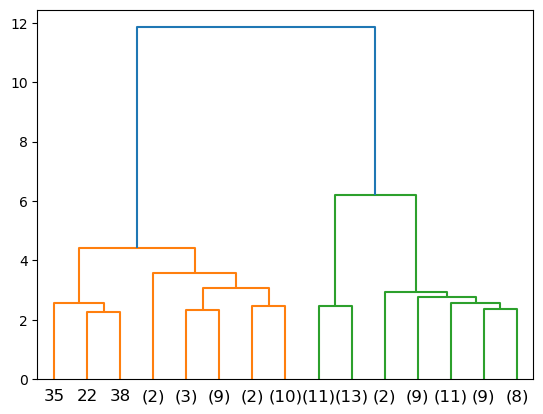

In [48]:
from subpred.clustering import get_linkage, get_cluster_labels, dendrogram_plot

# TODO PCA plot from first clusteing notebook

linkage = get_linkage(
    df_pssm_ecoli_secondary_active, standardize=False, method="ward", metric="euclidean"
)
dendrogram = dendrogram_plot(linkage, max_leaves=15)


In [49]:
cluster_labels = get_cluster_labels(
    linkage, n_clusters=2, index=df_pssm_ecoli_secondary_active.index
)
cluster_labels.value_counts()


2    63
1    29
dtype: int64

In [50]:
records_go_ecoli_all = (
    df_go_ecoli[["Uniprot", "go_term"]]
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_ecoli_mf = (
    df_go_ecoli[df_go_ecoli.aspect == "F"][["Uniprot", "go_term"]]
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
# TODO TCDB enrichment
records_dict = {"go_all": records_go_ecoli_all, "go_mf": records_go_ecoli_mf}

In [51]:
from subpred.enrichment_analysis import cluster_enrichment_analysis, enrichment_analysis

cluster_enrichment_analysis(cluster_labels, set(df_pssm_ecoli_secondary_active.index.tolist()), records_dict, p_cutoff=0.1)

CLUSTER 1
go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


go_mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


go_mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


In [52]:

# TODO look at tcdb, interpro as well.
# TODO make list of go terms that sound like good candidates, only look at those. 

res_cl1 = enrichment_analysis(
    set(df_pssm_ecoli_secondary_active.index.tolist()),
    proteins_subset=set(cluster_labels[cluster_labels == 1].index.tolist()),
    annotations=records_go_ecoli_mf
)
res_cl1[res_cl1.annotated_subset>5].sort_values("percentage_of_annotated", ascending=False)


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,solute:anion antiporter activity,92,11,29,7,3.467391,63.64,1.013504,0.020855,1.000000,1.0
7,binding,92,15,29,8,4.728261,53.33,0.758690,0.049130,1.000000,1.0
22,inorganic anion transmembrane transporter acti...,92,12,29,6,3.782609,50.00,0.665581,0.127448,0.975255,1.0
25,amino acid transmembrane transporter activity,92,15,29,7,4.728261,46.67,0.566045,0.141393,0.957120,1.0
8,anion transmembrane transporter activity,92,38,29,16,11.978261,42.11,0.417653,0.054669,1.000000,1.0
26,organic anion transmembrane transporter activity,92,27,29,11,8.510870,40.74,0.370125,0.163320,1.000000,1.0
28,carboxylic acid transmembrane transporter acti...,92,28,29,11,8.826087,39.29,0.317658,0.206142,1.000000,1.0
29,organic acid transmembrane transporter activity,92,28,29,11,8.826087,39.29,0.317658,0.206142,1.000000,1.0
106,antiporter activity,92,26,29,9,8.195652,34.62,0.135066,0.434610,0.714872,1.0
171,transmembrane transporter activity,92,92,29,29,29.000000,31.52,0.000000,1.000000,1.000000,1.0


In [55]:
res_cl2 = enrichment_analysis(
    set(df_pssm_ecoli_secondary_active.index.tolist()),
    proteins_subset=set(cluster_labels[cluster_labels == 2].index.tolist()),
    annotations=records_go_ecoli_mf
)
res_cl2[res_cl2.annotated_subset>5].sort_values("percentage_of_annotated", ascending=False)

,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,potassium ion transmembrane transporter activity,92,6,63,6,4.108696,100.00,0.546282,0.095286,1.0,1.0
0,metal ion transmembrane transporter activity,92,19,63,17,13.010870,89.47,0.385817,0.021529,1.0,1.0
13,metal cation:monoatomic cation antiporter acti...,92,7,63,6,4.793478,85.71,0.323890,0.288074,1.0,1.0
5,sodium ion transmembrane transporter activity,92,13,63,11,8.902174,84.62,0.305274,0.151319,1.0,1.0
14,carbohydrate:cation symporter activity,92,14,63,11,9.586957,78.57,0.198359,0.291639,1.0,1.0
1,inorganic cation transmembrane transporter act...,92,56,63,42,38.347826,75.00,0.131245,0.074206,1.0,1.0
49,amide transmembrane transporter activity,92,8,63,6,5.478261,75.00,0.131245,0.510348,1.0,1.0
3,cation transmembrane transporter activity,92,64,63,47,43.826087,73.44,0.100871,0.097140,1.0,1.0
11,proton transmembrane transporter activity,92,41,63,30,28.076087,73.17,0.095621,0.260970,1.0,1.0
50,carbohydrate:proton symporter activity,92,11,63,8,7.532609,72.73,0.086850,0.522449,1.0,1.0


In [57]:
# Problem: Keine sind signifikant mit hypergeom. test, wahrscheinlich weil sehr viele Annotationen und wenige Samples
# Liste an GO terms die interessant klingen:

{go_owl.get_label(term) for term in go_owl.get_children(go_owl.get_identifier("transmembrane transporter activity")) | go_owl.get_children(go_owl.get_identifier("active transmembrane transporter activity")) | go_owl.get_children(go_owl.get_identifier("secondary active transmembrane transporter activity"))}

{'acetate ester transmembrane transporter activity',
 'active ion transmembrane transporter activity',
 'active transmembrane transporter activity',
 'alkane transmembrane transporter activity',
 'amide transmembrane transporter activity',
 'amine transmembrane transporter activity',
 'antimonite secondary active transmembrane transporter activity',
 'antiporter activity',
 'arsenite secondary active transmembrane transporter activity',
 'auxin transmembrane transporter activity',
 'azole transmembrane transporter activity',
 'bicyclomycin transmembrane transporter activity',
 'bilirubin secondary active transmembrane transporter activity',
 'biopterin transmembrane transporter activity',
 'carbohydrate derivative transmembrane transporter activity',
 'carbohydrate transmembrane transporter activity',
 'carbon dioxide transmembrane transporter activity',
 'chlorophyll catabolite transmembrane transporter activity',
 'efflux transmembrane transporter activity',
 'ferric triacetylfusarin

In [72]:
df_go_ecoli[df_go_ecoli.go_term.str.contains("uniport")]

,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
44448,P0A769,enables,IMP,F,GO:0015292,uniporter activity
248599,P76198,enables,ISS,F,GO:0015292,uniporter activity
